## 第１問
シミュレーション自体は、C++を用いて行い、そのソースコードは、buffon 2.cppである。

### (2)

nはばら撒く回数で、$\pi(n)$はばら撒いた回数である。点線の$\pi$は$\pi$の実際の値であり、折れ線MTは乱数としてメルセンヌツイスタを採用してBuffonの針を実行した結果である。

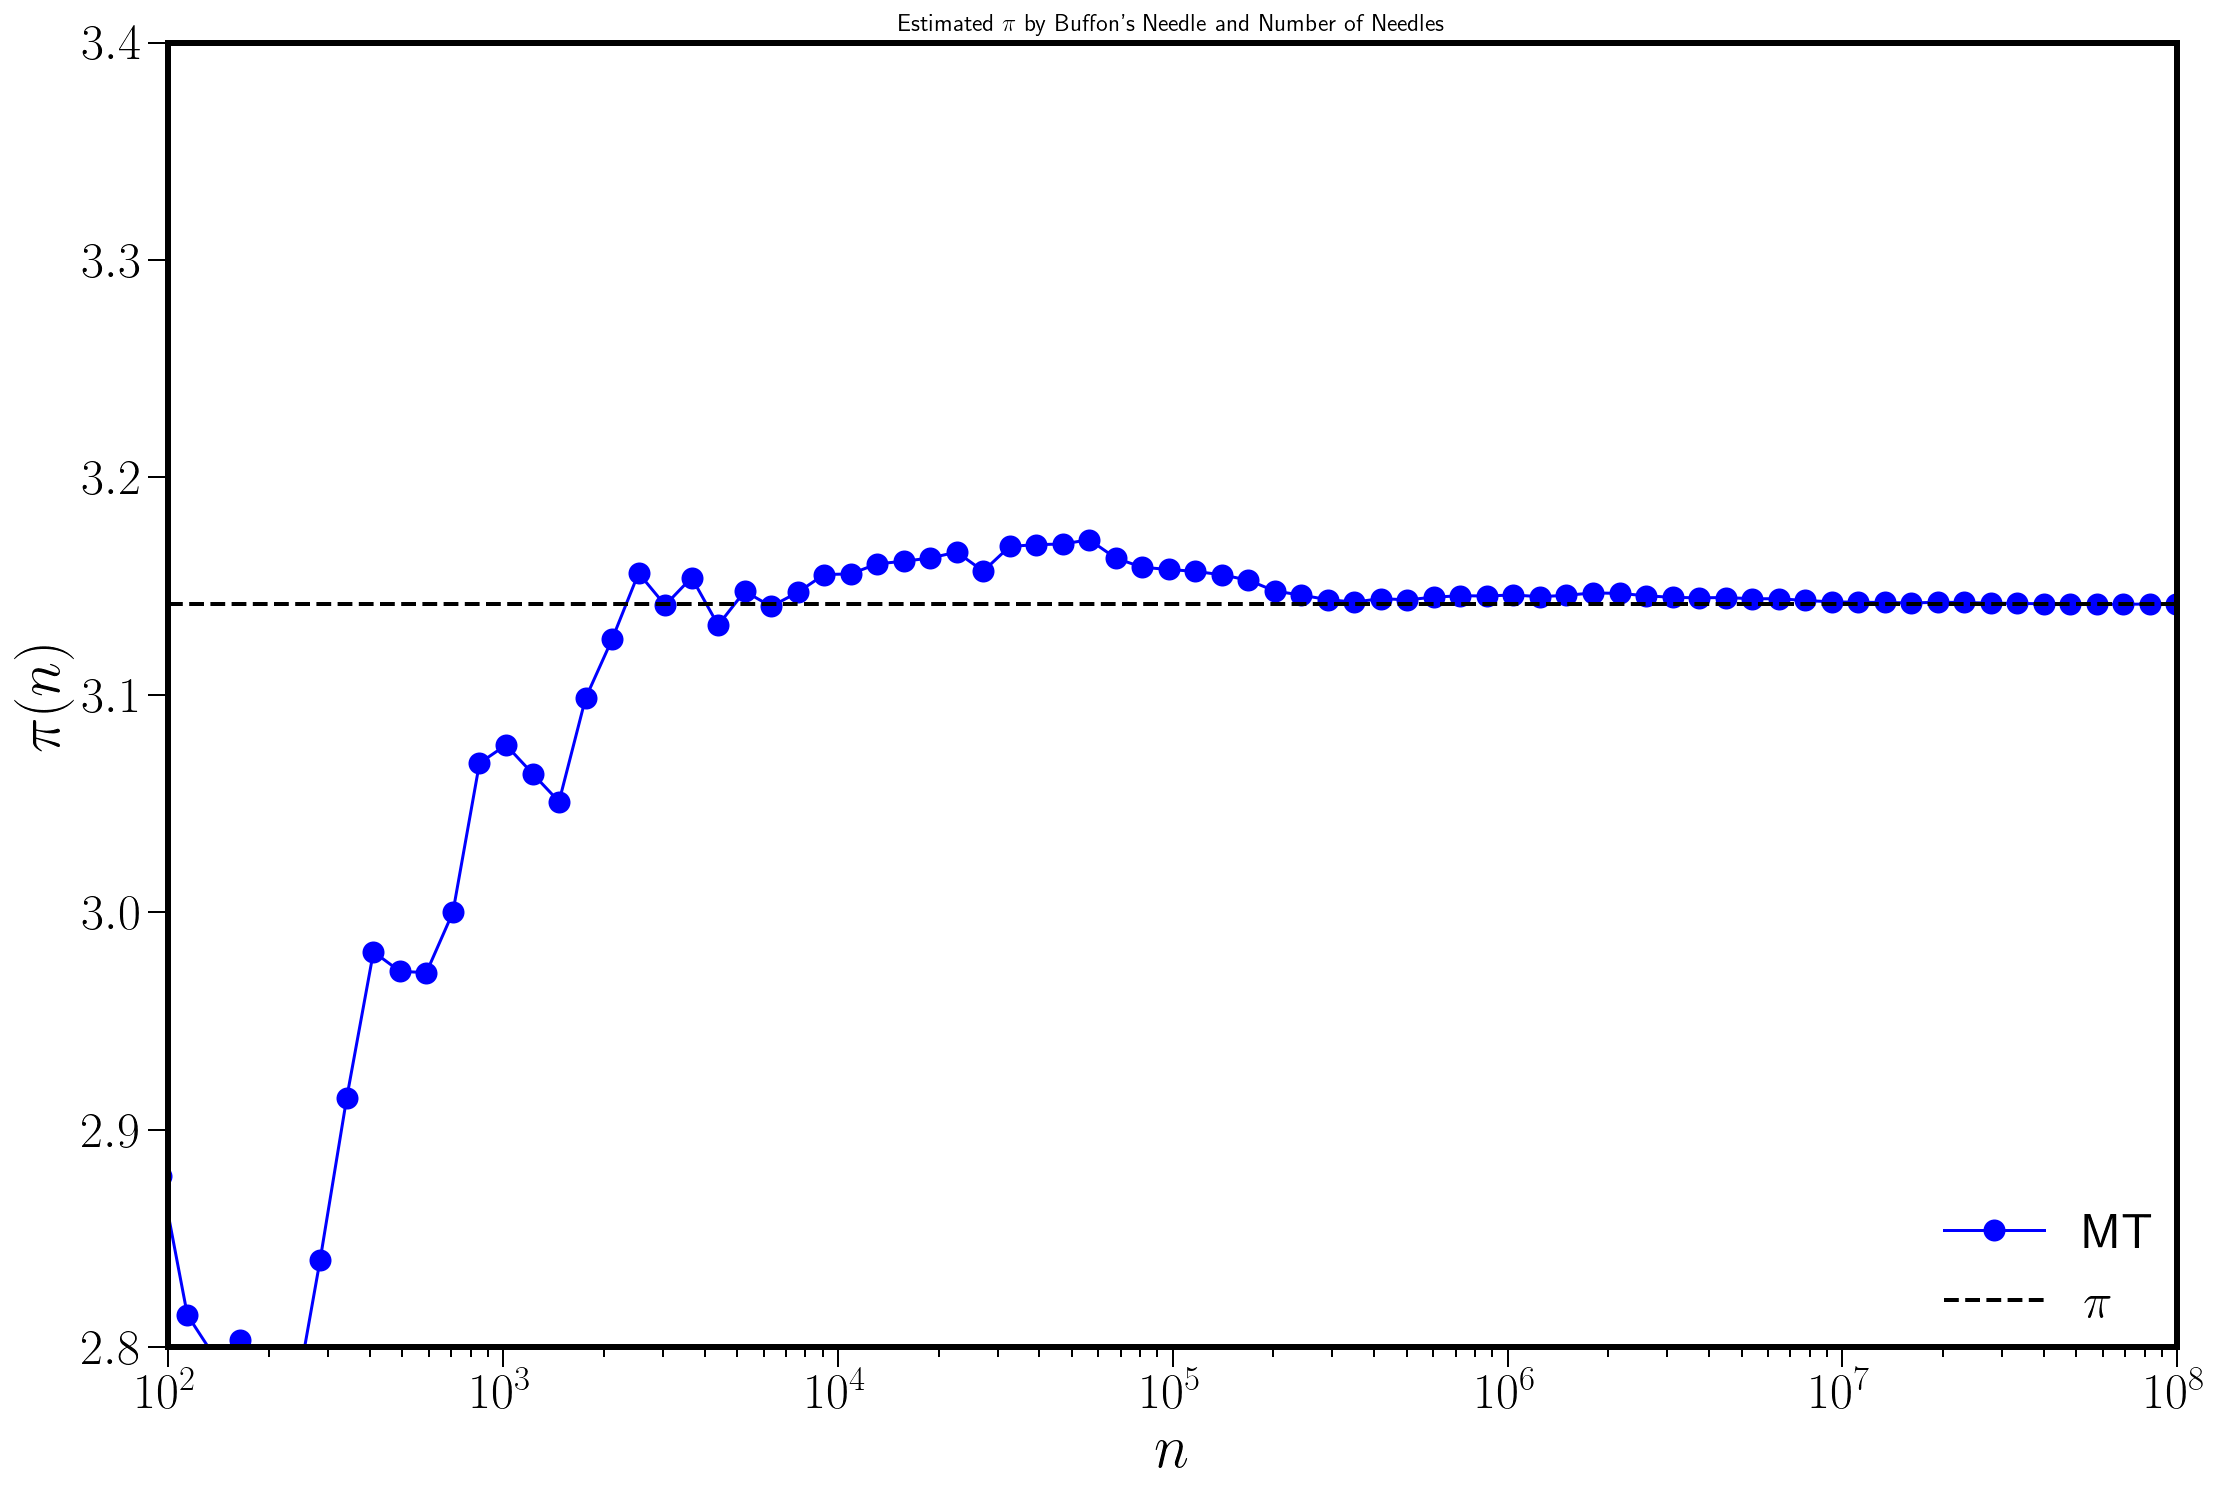

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
#図の解像度が上がる
%config InlineBackend.figure_format = 'retina'
import numpy as np

#Tex フォント
plt.rcParams["text.usetex"] =True 
#図全体のサイズやアスペクト比を変える
fig = plt.figure(figsize=(18,12))
#複数の図を並べる時ここを変える

 ###########################
plt.subplot(111)
ax1 = plt.gca()
#各自ファイルのパスを変えること
n, p, pi, error  = np.loadtxt("./buffon_l1.0000d1.0000.dat", comments='#', unpack=True)
plt.plot(n, pi, "o-",markersize=10,color="b",label=r"MT")
###Drawing a line ######
x= np.linspace(1e2, 1e8, 100) 
y= np.pi+0*x
plt.plot(x, y, "--",markersize=3,linewidth = 2.0, color="k",label=r"$\pi$")
#########
#図の書式設定
plt.title(r"Estimated $\pi$ by Buffon's Needle and Number of Needles")
plt.xscale('log')
plt.ylim(2.8, 3.4)
plt.tick_params(which='major',width = 1, length = 10)
plt.tick_params(which='minor',width = 1, length = 5)
ax1.set_xlim(1e2, 1e8)
ax1.spines['top'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['left'].set_linewidth(3)
ax1.spines['right'].set_linewidth(3)
plt.xlabel(r"$n$",color='k', size=30)
plt.ylabel(r"$\pi(n)$",color='k', size=30)
plt.xticks(color='k', size=25)
plt.yticks(color='k', size=25)
#図の凡例の有無や位置，サイズを調整
plt.legend(ncol=1, loc=4, borderaxespad=0, fontsize=25,frameon=False)

#図のマージン設定
plt.subplots_adjust(wspace=0.3, hspace=0.25)

#各自ファイルのパスを変えること．
plt.savefig('./buffon.png')
plt.savefig('./buffon.pdf')

### (3)

誤差$\delta(n) = |\pi(n) - \pi|$でもとめた。また、これをscipy.optimize.curve_fitを用いて、$\frac{C}{\sqrt{n}}$に最小二乗フィッティングし、$C$の値を決めた。

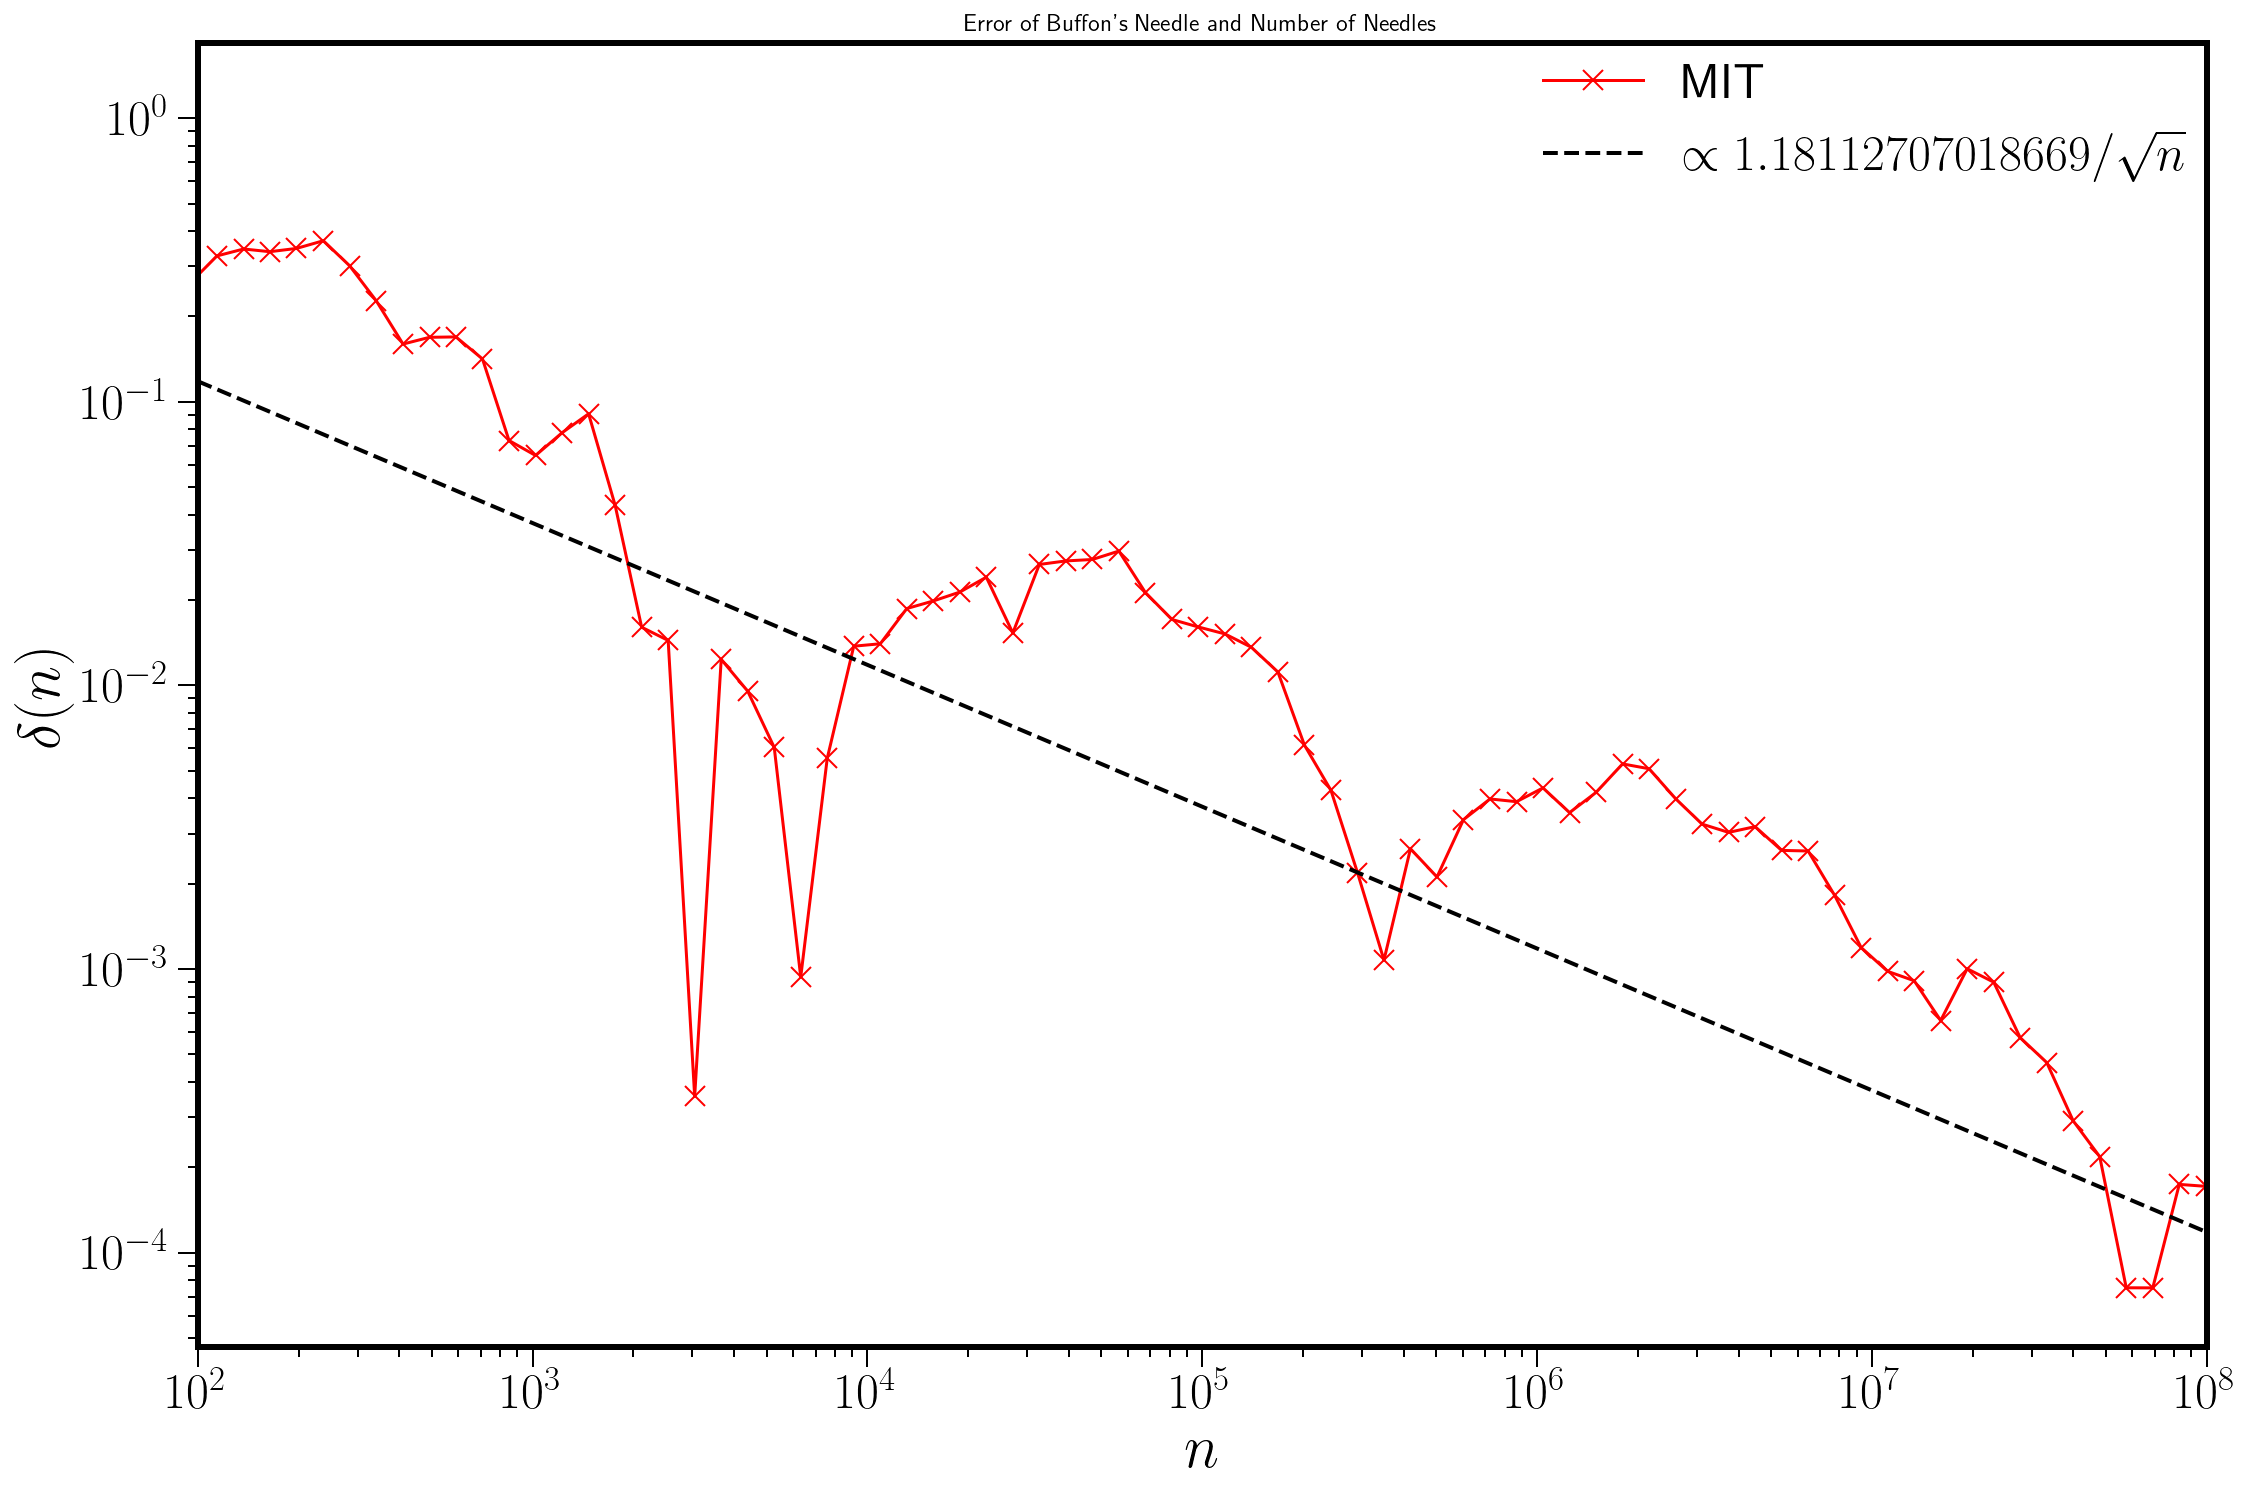

In [7]:
def res(n, C):
    return C/np.sqrt(n)

#図全体のサイズやアスペクト比を変える
fig = plt.figure(figsize=(18,12))
#複数の図を並べる時ここを変える

################
plt.subplot(111)
ax2 = plt.gca()
#各自ファイルのパスを変えること
#n, pi,error  = np.loadtxt("./Documents/GitHub/2022-simulation-training-main/Lecture2/pi-error.dat", comments='#', unpack=True)
popt, pcov = curve_fit(res, n, error)
plt.plot(n, error, "x-",markersize=10,color="r",label=r"MIT")
plt.xscale('log')
plt.yscale('log')

###Drawing a line ######
x= np.linspace(1e2, 1e8, 100) 
y=res(x, *popt)
plt.plot(x, y, "--",markersize=3,linewidth = 2.0, color="k",label=r"$\propto " + f"{popt[0]:.16g}" + r"/\sqrt{n}$")
#########
plt.title(r"Error of Buffon's Needle and Number of Needles")

#図の書式設定
plt.tick_params(which='major',width = 1, length = 10)
plt.tick_params(which='minor',width = 1, length = 5)
ax2.set_xlim(1e2, 1e8)
ax2.spines['top'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['left'].set_linewidth(3)
ax2.spines['right'].set_linewidth(3)
plt.xlabel(r"$n$",color='k', size=30)
plt.ylabel(r"$\delta(n)$",color='k', size=30)
plt.xticks(color='k', size=25)
plt.yticks(color='k', size=25)
#図の凡例の有無や位置，サイズを調整
plt.legend(ncol=1, loc=1, borderaxespad=0, fontsize=25,frameon=False)
#################################

#図のマージン設定
plt.subplots_adjust(wspace=0.3, hspace=0.25)

#各自ファイルのパスを変えること．
plt.savefig('./buffon.png')
plt.savefig('./buffon.pdf')

誤差はこの式に従っていることがわかる。